### Project Title: Gender Detection using TensorFlow and Computer Vision

### Primary Objective:
Develop a gender detection system using computer vision techniques and TensorFlow. This involves collecting and preprocessing a diverse dataset of facial images, training and optimizing deep learning models for gender classification, and integrating the model for usage within the designated environment. The goal is to achieve high accuracy and robustness in gender detection across various demographics and environmental conditions.

### Install requried dependicies
- Tensorflow
- opencv-python
- os
- sklearn

In [ ]:
!pip install opencv-python
!pip install scikit-learn
!pip install tensorflow
!pip install os

This code imports the drive `module` from the google.colab package and then calls the `mount()` function with the path `'/content/gdrive'`. This function mounts your Google Drive to the specified path in the Colab environment.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



- Import the `ZipFile` class from the `zipfile` module, which allows us to work with zip archives.
- And specify the path to the zip file in your Google Drive.
- Open the zip file in read mode using a `with` statement and the `ZipFile` constructor.
- Within the `with` block, we call the `extractall()` method to extract all the contents of the zip file into the current directory.
- Finally, Print a message to indicate that the extraction process is complete.

Make sure to replace `"/content/gdrive/MyDrive/UTKFace.zip"` with the path to your zip file in Google Drive.

In [ ]:
from zipfile import ZipFile
file_name = "/content/gdrive/MyDrive/UTKFace.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


### Import the requried dependies

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "/content/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the content directory
import os

### Format of the file: age_gender_ethnicity_datetime

In [ ]:
path = "/content/UTKFace"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
35_1_0_20170103182449434.jpg.chip.jpg


#### Sample image in dataset

array([[208, 206, 205, ...,  93,  94,  97],
       [206, 204, 207, ...,  94,  95,  98],
       [204, 199, 203, ...,  95,  96, 100],
       ...,
       [237, 237, 236, ...,  95,  95,  96],
       [236, 236, 234, ...,  95,  95,  96],
       [236, 234, 232, ...,  95,  95,  96]], dtype=uint8)
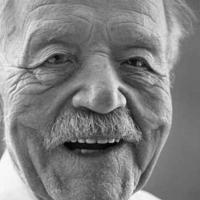

In [ ]:
import cv2
image = cv2.imread("/content/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg",0)
image

## UTKFace Dataset Image Processing

This Python script processes images from the UTKFace dataset, which contains facial images with associated age and gender labels. The script reads images using OpenCV, resizes them to 64x64 pixels, and extracts age and gender information from the file names. The processed images, along with their corresponding age and gender labels, are stored in separate lists.

In [ ]:
import cv2
import os

# Get the current working directory
cwd = os.getcwd()

# Change the working directory to the directory containing the images
os.chdir(cwd + "/UTKFace")

# Get a list of all the files in the directory
files = os.listdir()

images = []
ages = []
genders = []

# Loop through each file in the directory
for file in files:
    # Read the image using OpenCV
    image = cv2.imread(file, 0)

    # Check if the image is None
    if image is None:
        continue

    # Resize the image to a size of 64x64
    image = cv2.resize(image, dsize=(64, 64))

    # Reshape the image to a 3-dimensional array
    image = image.reshape((image.shape[0], image.shape[1], 1))

    # Add the image to the images list
    images.append(image)

    # Split the file name into its components
    split_var = file.split('_')

    # Get the age and gender from the file name
    ages.append(int(split_var[0]))
    genders.append(int(split_var[1]))

# Change the working directory back to the original directory
os.chdir(cwd)

Number of images in dataset

In [ ]:
len(images)

23708

Plotting the graph representing distributin of ages in dataset

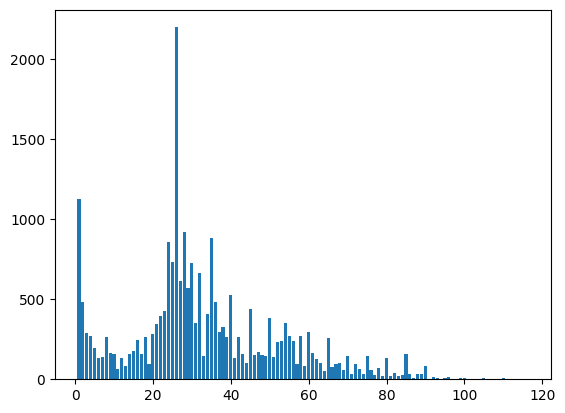

Min value: 1
Max value: 116


In [ ]:
import matplotlib.pyplot as plt
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Min value:",min(ages))
print("Max value:",max(ages))

The `display` function is used to display a grayscale image using matplotlib. It takes an image (`img`) as input and plots it using `plt.imshow()`. It then sets the colormap to grayscale using `plt.set_cmap('gray')` to ensure the image is displayed in grayscale. Finally, it shows the image using `plt.show()`.

Gender: 1 Age: 35


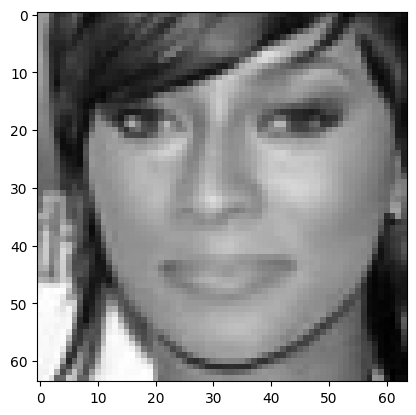

In [ ]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 500
sample = images[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
display(sample)

### Age categorization
The `age_group` function categorizes an individual's age into different groups based on predefined age ranges. It takes an age value (`age`) as input and returns an integer representing the age group.


In [ ]:
def age_group(age):
    if age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 60:
        return 3
    else:
        return 4

### Data Preprocessing
The preprocessing code prepares the data for training a machine learning model. It creates target labels and features, normalizes the features, and displays an example of the preprocessed data.


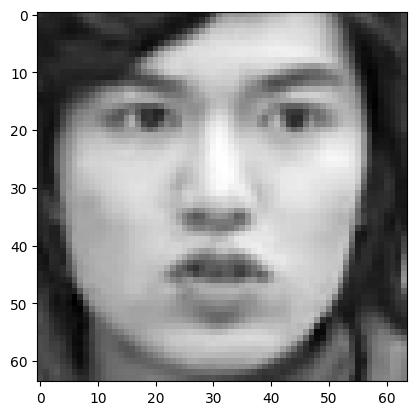

In [ ]:
# pre processing
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 4
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255 # Normalization
display(features[550])

### Spliting data into train and test sests
This process ensures that the model is trained on one subset of data and evaluated on another independent subset.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.layers import *
from keras.models import *
from keras import backend as K

1. **ImageDataGenerator**: This is a utility provided by Keras for data augmentation. It generates batches of augmented data by applying various transformations to the input data (images in this case), which helps in training a more robust model.

2. **train_datagen**: It creates a generator using the previously defined `datagen`. This generator will yield augmented batches of data during training.

3. **Model Architecture**:
   - **Input Layer**: Defines the input shape for the images.
   - **Convolutional Layers**: These layers perform feature extraction. Each layer is followed by a rectified linear unit (ReLU) activation function.
   - **Max Pooling Layers**: These layers downsample the feature maps obtained from the convolutional layers.
   - **Dropout Layers**: These layers help in regularization by randomly dropping a fraction of the input units, preventing overfitting.
   - **Flatten Layer**: Flattens the output from the convolutional layers into a 1D array.
   - **Dense (Fully Connected) Layers for Age Prediction**:
     - There are several dense layers with ReLU activation followed by dropout layers.
     - The final layer has a single neuron with ReLU activation, presumably predicting the age.
   - **Dense Layers for Gender Prediction**:
     - Similar to age prediction, it has dense layers with ReLU activation followed by dropout layers.
     - The final layer has a single neuron with sigmoid activation, which outputs the probability of the input image belonging to the female gender.

ReLU stands for Rectified Linear Unit. It is an activation function commonly used in neural networks, particularly in deep learning models. Mathematically, the ReLU function is defined as:

f(x) = max(0, x)

In other words, it returns zero for negative input values and returns the input value itself for positive input values. ReLU activation introduces non-linearity to the network, allowing it to learn complex patterns and representations in the data. It is preferred over other activation functions like sigmoid or tanh because it helps alleviate the vanishing gradient problem and accelerates the convergence of gradient-based optimization algorithms during training. Additionally, ReLU is computationally efficient to compute compared to other activation functions.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,            # Rotate the image by up to 10 degrees
    width_shift_range=0.1,        # Shift the image horizontally by up to 10% of the width
    height_shift_range=0.1,       # Shift the image vertically by up to 10% of the height
    shear_range=0.2,              # Shear the image by up to 20%
    zoom_range=0.2,               # Zoom in or out by up to 20%
    horizontal_flip=True,         # Flip the image horizontally
    vertical_flip=True,           # Flip the image vertically
    fill_mode='nearest'           # Fill in any empty pixels with the nearest value
)

train_datagen = datagen.flow(x_train, y_train, batch_size=32)

inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)
dropout = Dropout(0.5)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

In [ ]:
model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 62, 62, 32)           320       ['input_2[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 60, 60, 64)           18496     ['conv2d_3[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)           0         ['conv2d_4[0][0]']            
 g2D)                                                                                         

### Fitting Model
The `fit` method is used to train the model using the training data and validate it using the testing data. It specifies the input features (`x_train`), target labels (`y_train`), validation data (`x_test` and `y_test`), number of epochs, batch size, and whether to shuffle the data during training.


In [ ]:
h = model.fit(x_train,[y_train[:,0],y_train[:,1]],
              validation_data=(x_test,[y_test[:,0],y_test[:,1]]),
              epochs = 25,
              batch_size=128,
              shuffle = True)

Epoch 1/25
149/149 [==============================] - 21s 68ms/step - loss: 0.8246 - dense_13_loss: 0.1333 - dense_19_loss: 0.6913 - dense_13_accuracy: 0.0517 - dense_19_accuracy: 0.5369 - val_loss: 0.7139 - val_dense_13_loss: 0.0440 - val_dense_19_loss: 0.6699 - val_dense_13_accuracy: 0.1071 - val_dense_19_accuracy: 0.6984
Epoch 2/25
149/149 [==============================] - 8s 54ms/step - loss: 0.6821 - dense_13_loss: 0.0613 - dense_19_loss: 0.6209 - dense_13_accuracy: 0.0865 - dense_19_accuracy: 0.6980 - val_loss: 0.5615 - val_dense_13_loss: 0.0405 - val_dense_19_loss: 0.5210 - val_dense_13_accuracy: 0.1132 - val_dense_19_accuracy: 0.8016
Epoch 3/25
149/149 [==============================] - 8s 55ms/step - loss: 0.5840 - dense_13_loss: 0.0539 - dense_19_loss: 0.5301 - dense_13_accuracy: 0.0929 - dense_19_accuracy: 0.7719 - val_loss: 0.4777 - val_dense_13_loss: 0.0338 - val_dense_19_loss: 0.4438 - val_dense_13_accuracy: 0.1120 - val_dense_19_accuracy: 0.8248
Epoch 4/25
149/149 [====

### Saving model

In [ ]:
model.save('data.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Model Loss Plot
Plotting the training and validation loss over epochs to visualize the model's performance during training. This helps to monitor whether the model is overfitting or underfitting and to identify the optimal number of epochs.

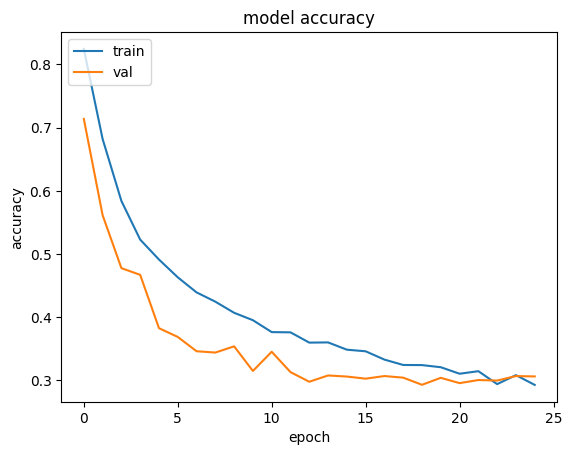

In [ ]:
history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Testing Sample Images

This section defines functions to process images and predict gender and age groups. It includes functions to display images, categorize age groups, map predicted age distributions to age groups, predict gender based on probabilities, and predict gender and age groups for sample images. The provided sample images are displayed, along with their actual gender and age, followed by predictions made by the model for gender and age groups.

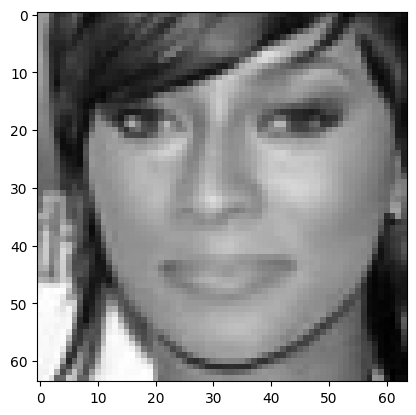

Actual Gender: Female Age: 35
1/1 [==============================] - 0s 299ms/step
Values: [array([[0.56451076]], dtype=float32), array([[0.9972084]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 18-29


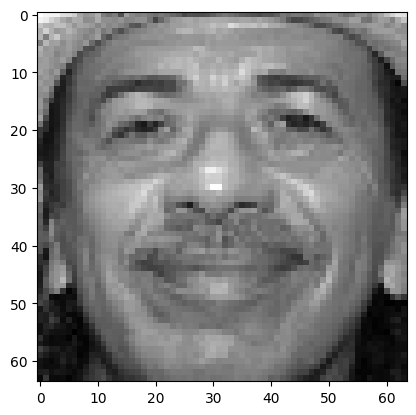

Actual Gender: Male Age: 47
1/1 [==============================] - 0s 18ms/step
Values: [array([[0.7354638]], dtype=float32), array([[0.0357451]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 30-59


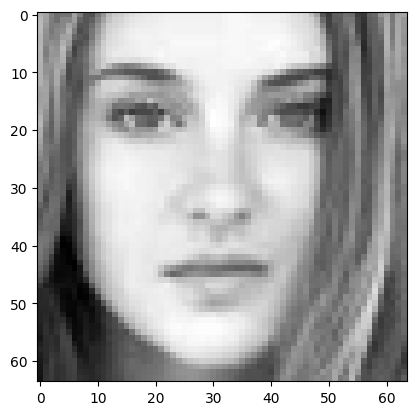

Actual Gender: Female Age: 21
1/1 [==============================] - 0s 20ms/step
Values: [array([[0.56451076]], dtype=float32), array([[0.999961]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 18-29


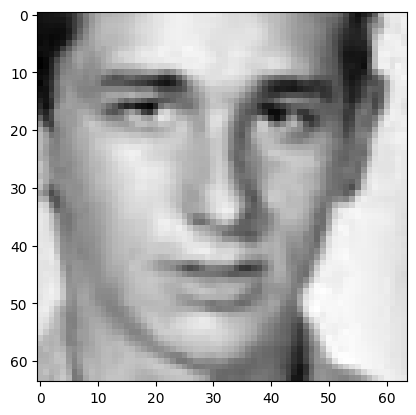

Actual Gender: Male Age: 26
1/1 [==============================] - 0s 18ms/step
Values: [array([[0.56451076]], dtype=float32), array([[0.0357451]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 18-29


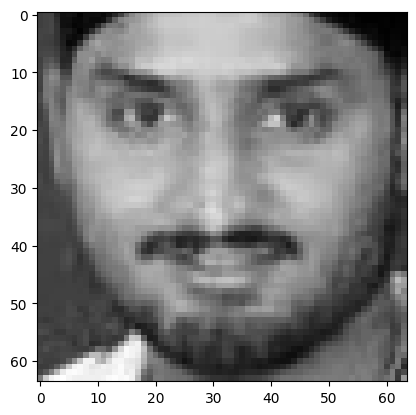

Actual Gender: Male Age: 28
1/1 [==============================] - 0s 19ms/step
Values: [array([[0.56451076]], dtype=float32), array([[0.0357451]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 18-29


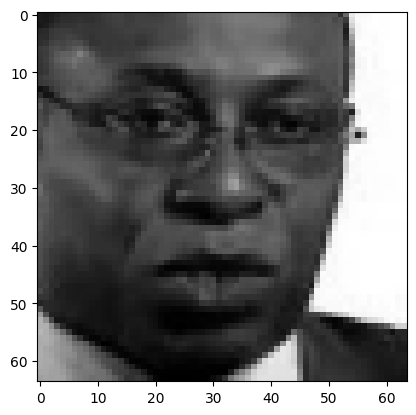

Actual Gender: Male Age: 49
1/1 [==============================] - 0s 20ms/step
Values: [array([[0.7081668]], dtype=float32), array([[0.0357451]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 30-59


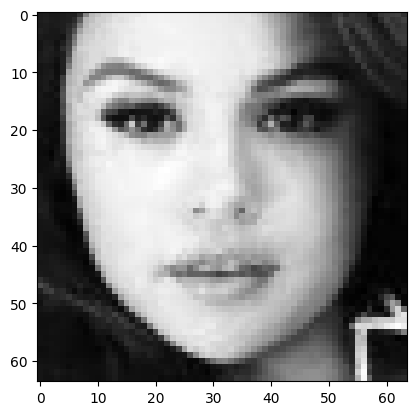

Actual Gender: Female Age: 23
1/1 [==============================] - 0s 18ms/step
Values: [array([[0.48904246]], dtype=float32), array([[1.]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 18-29


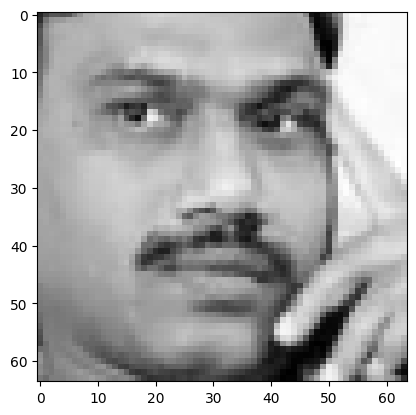

Actual Gender: Male Age: 34
1/1 [==============================] - 0s 28ms/step
Values: [array([[0.56451076]], dtype=float32), array([[0.0357451]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 18-29


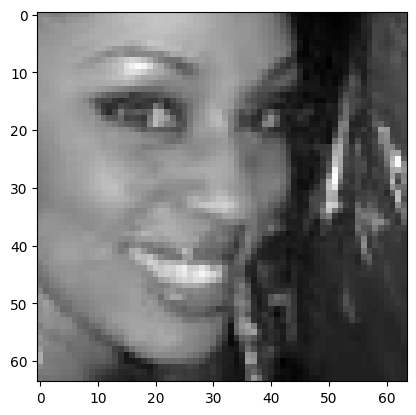

Actual Gender: Female Age: 31
1/1 [==============================] - 0s 35ms/step
Values: [array([[0.6374965]], dtype=float32), array([[0.99814105]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 30-59


In [ ]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()

def age_group(age):
    if age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 60:
        return 3
    else:
        return 4

def get_age(distr):
    distr = distr * 4
    if 0.5 <= distr < 1.5:
        return "0-17"
    elif 1.5 <= distr < 2.5:
        return "18-29"
    elif 2.5 <= distr < 3.5:
        return "30-59"
    else:
        return "60+"

def get_gender(prob):
    return "Male" if prob < 0.5 else "Female"

def get_result(sample):
    sample = sample / 255
    val = model.predict(np.array([sample]))
    age = get_age(val[0])
    gender = get_gender(val[1])
    print("Values:", val, "\nPredicted Gender:", gender, "Predicted Age:", age)

indexes = [500, 59, 80, 2, 4546, 7, 9, 256, 45]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:", get_gender(genders[idx]), "Age:", ages[idx])
    res = get_result(sample)

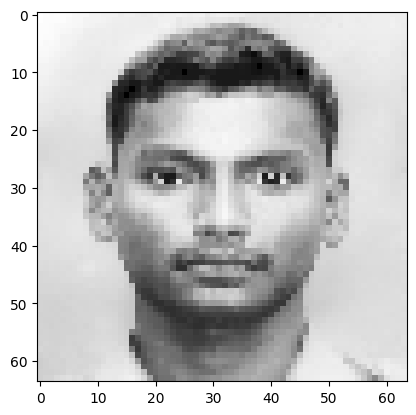

Actual Gender: Male Age: 20
1/1 [==============================] - 0s 57ms/step
Values: [array([[0.5711805]], dtype=float32), array([[0.4470629]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 18-29


In [ ]:
image = cv2.imread("/content/Screenshot 2024-04-09 082203.png",0)
# Resize the image to a size of 64x64
image = cv2.resize(image, dsize=(64, 64))

# Reshape the image to a 3-dimensional array
image = image.reshape((image.shape[0], image.shape[1], 1))
sample = image
display(sample)
print("Actual Gender:","Male","Age:",20)
res = get_result(sample)